# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import pylab
%matplotlib inline

np.random.seed(8080)

def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

df = pd.read_csv('data/human_body_temperature.csv')

In [128]:
#df.head()


### Q1: Is the distribution of body temperature normal?

The distribution is approximately normal based on the histogram and ECDF plots, Figures 1 and 2 below, respectively.

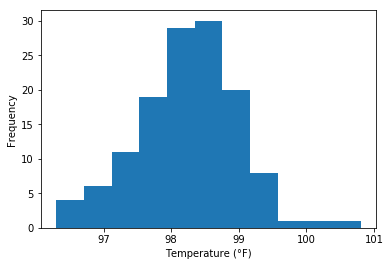

In [67]:
# Plot Histogram

body_temp = df.temperature

# Set bins to sqrt of the sample size
n_bins = int(np.sqrt(len(body_temp)))

_ = df.temperature.plot(kind='hist', bins=n_bins)
_ = plt.xlabel('Temperature (°F)')

Figure 1. Body Temperatures

In [68]:
# Calculate the ECDF
x_exp, y_exp = ecdf(body_temp)

temp_random = np.random.normal(np.mean(body_temp), np.std(body_temp), 10000)
x_rand, y_rand = ecdf(temp_random)

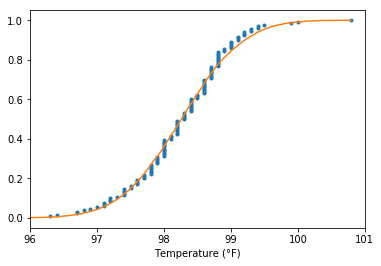

In [129]:
# Plot the ECDF
_ = plt.plot(x_exp, y_exp, marker='.', linestyle='none')
_ = plt.plot(x_rand, y_rand)
_ = plt.xlim([96,101])
_ = plt.xlabel('Temperature (°F)')

Figure 2. CDF of Body Temperatures.

### Q2: Is the sample size large? Are the observations independent?

The sample size (n = 130) is large enough to apply the Central Limit Theorem, considering that the sample size is larger than 30 and the distribution is approximately normal.
The observations can be considered independent, assuming that the data for one person's measured temperature does not affect the temperature of another person in the sample.

In [82]:
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### Q3: Is the true population mean really 98.6 degrees F?

We will test the following:

* **H<sub>0</sub>**: x̅ = 98.6 °F

* **H<sub>a</sub>**: x̅ $\neq$ 98.6 °F

Hypothesis testing using a bootstrap method for 10,000 samples, the p-value equals 0.0. This indicates that we should reject the null hypothesis that the population mean equals 98.6 °F. In this sample, the mean temperature equals 98.2 °F.

In [105]:
np.mean(body_temp)

bs_replicates = np.empty(10000)

size = len(bs_replicates)

for i in range(size):
    bs_sample = np.random.choice(body_temp, len(body_temp))
    bs_replicates[i] = np.mean(bs_sample)
    
bs_rep_p = np.sum(bs_replicates >= 98.6) / size
bs_rep_mean = np.mean(bs_replicates)
bs_rep_std = np.std(bs_replicates)
print(bs_rep_p)
print(bs_rep_mean)

0.0
98.24911844615384


Q4: Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [87]:
temp_sample = np.random.choice(body_temp, 10)

In [93]:
temp_stat = stats.ttest_1samp(temp_sample, 98.6)
print("t-score =", temp_stat[0])
print("p-value =", temp_stat[1])

t-score = -1.6258610512298088
p-value = 0.13842385160277357


Q5: At what temperature should we consider someone's temperature to be "abnormal"?

In [96]:
body_temp.describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

In [110]:
stats.norm.interval(0.95, loc=bs_rep_mean, scale=np.std(body_temp))

(96.8176435036713, 99.68059338863638)

Q6: Is there a significant difference between males and females in normal temperature?

In [112]:
df_male = df[df.gender == 'M']
df_female = df[df.gender == 'F']

stats.ttest_ind(df_male.temperature, df_female.temperature, equal_var=False)

Ttest_indResult(statistic=-2.285434538165611, pvalue=0.023938264182934196)

In [127]:
male_stats = df_male.describe()
male_stats.loc['mean'][0]

98.1046153846154

In [116]:
fem_stats = df_female.describe()